In [43]:
import numpy as np
import pandas as pd


In [44]:
data = pd.read_csv('/content/real_estate_price_size.csv')

In [45]:
data.head(10)

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


In [46]:
data.tail(10)

,price,size
90,251140.656,694.52
91,338078.168,1071.55
92,298170.880,694.52
93,266684.248,698.29
94,262477.856,698.29
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29
99,274922.856,705.29


In [47]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [48]:
(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,100.0,292289.47016,77051.727525,154282.128,234280.148,280590.716,335723.6960,500681.128
size,100.0,853.02420,297.941951,479.750,643.330,696.405,1029.3225,1842.510


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [50]:
data.shape

(100, 2)

In [51]:
data.isnull()

,price,size
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'price')

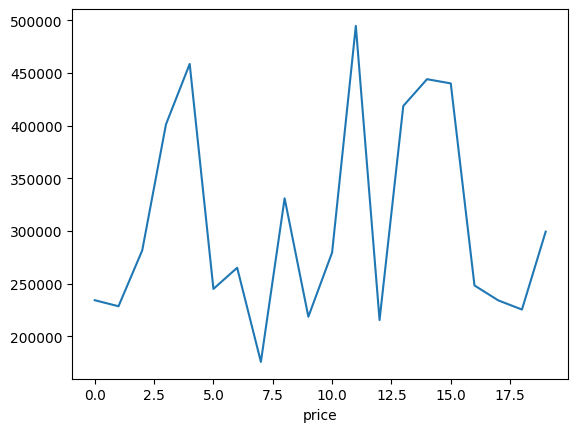

In [53]:
x = data['price'][0:20]
plt.plot(x)
plt.xlabel('price')

Text(0, 0.5, 'size')

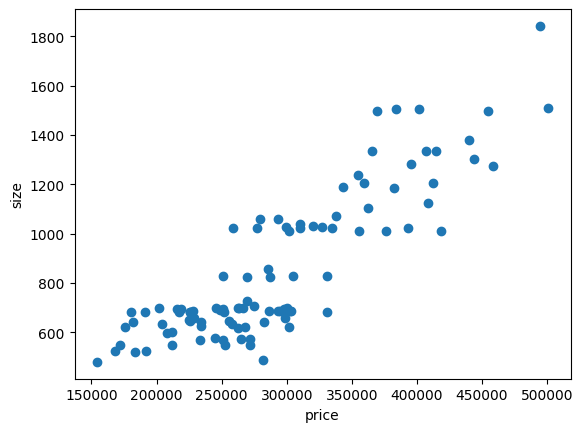

In [54]:
x = data['price']
y = data['size']
plt.scatter(x,y)
plt.xlabel('price')
plt.ylabel('size')

Text(0.5, 0, 'size')

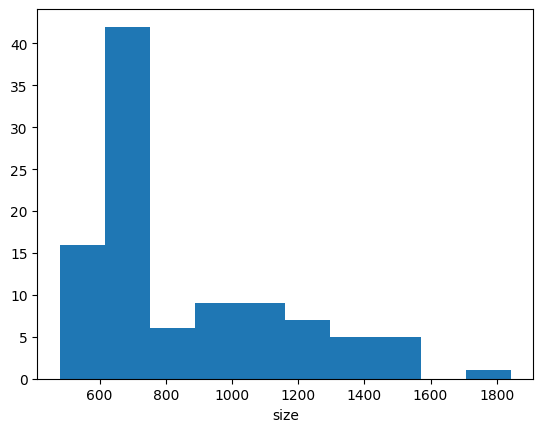

In [55]:
x = data['size']
plt.hist(x)
plt.xlabel('size')

<Axes: ylabel='size'>

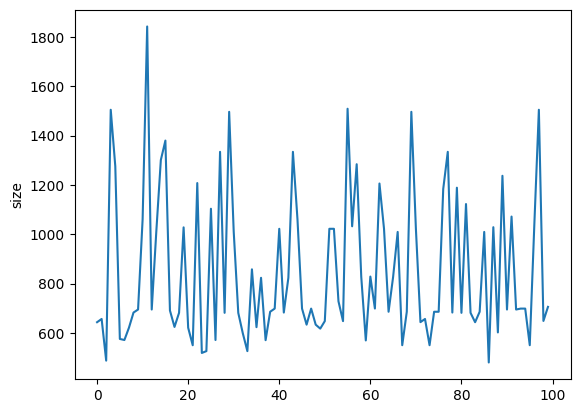

In [56]:
x = data['size']
sns.lineplot(x)


<Axes: ylabel='count'>

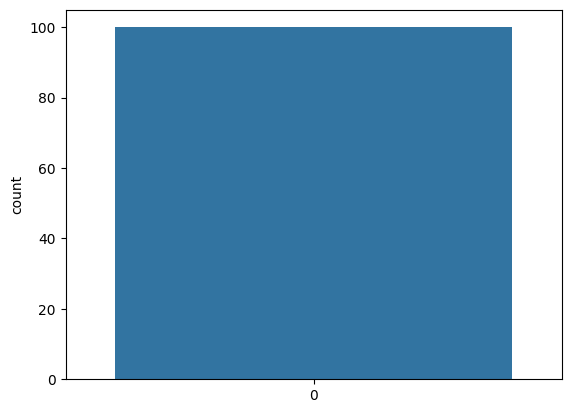

In [57]:
x = data['price']
sns.countplot(x)

<Axes: >

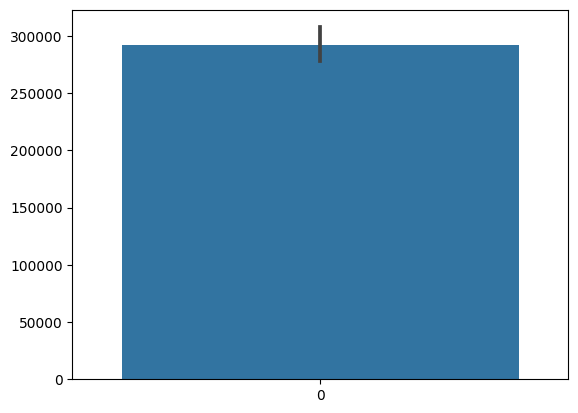

In [58]:
x = data['price']
sns.barplot(x)

<Axes: ylabel='price'>

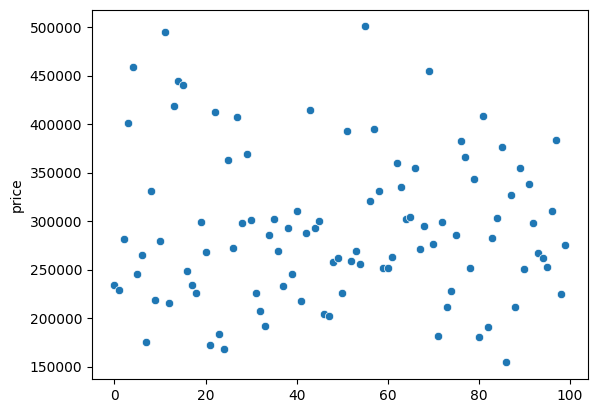

In [59]:
x = data['price']
sns.scatterplot(x)

<Axes: >

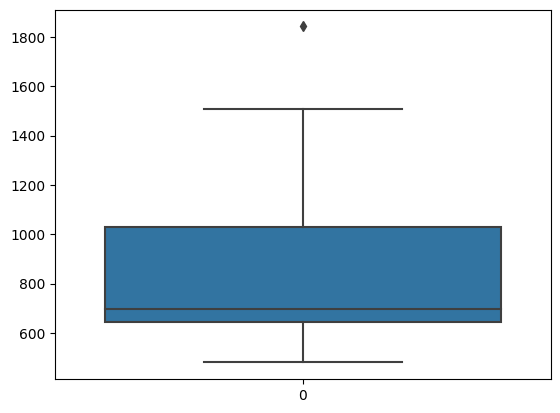

In [60]:
x = data['size']
sns.boxplot(x)

<ipython-input-61-e1d1965128b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='price', ylabel='Density'>

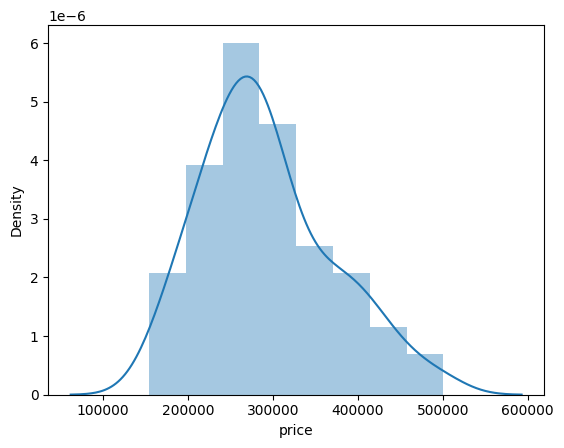

In [61]:
x = data['price']
sns.distplot(x)

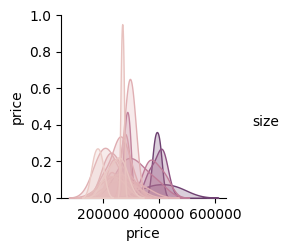

In [62]:
sns.pairplot(data, hue='size')

In [63]:
x = data['price'].sum()

In [64]:
y = data['size'].count()
print(y)

100


In [65]:
a =  data['price'].sum() / data['size'].count()
print(a)

292289.47015999997


In [66]:
data[data['price']>400000]

,price,size
3,401255.608,1504.75
4,458674.256,1275.46
11,494778.992,1842.51
13,418753.008,1009.25
14,444192.008,1300.96
15,440201.616,1379.72
22,412569.472,1207.45
27,406852.304,1334.10
43,414682.648,1334.10
55,500681.128,1508.84


In [67]:
data[data['price']>400000].count()

price    12
size     12
dtype: int64

In [68]:
x = data.drop('price', axis=1)
print(x)

       size
0    643.09
1    656.22
2    487.29
3   1504.75
4   1275.46
..      ...
95   549.80
96  1037.44
97  1504.75
98   648.29
99   705.29

[100 rows x 1 columns]


In [69]:
y = data['price']
print(y)

0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64


In [70]:
x.shape

(100, 1)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(30, 1)
(70,)
(30,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
print(lr.intercept_)
print(lr.coef_)

104282.66136022925
[216.81322575]


In [78]:
y_predict = lr.predict(x_test)

In [79]:
from sklearn.metrics import r2_score

In [80]:
r_squared = r2_score(y_test,y_predict)
r_squared

0.7277153827291032

In [81]:
lr.predict([[694.52]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([254863.7829104])

In [82]:
lr.predict([[705.29]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([257198.86135177])

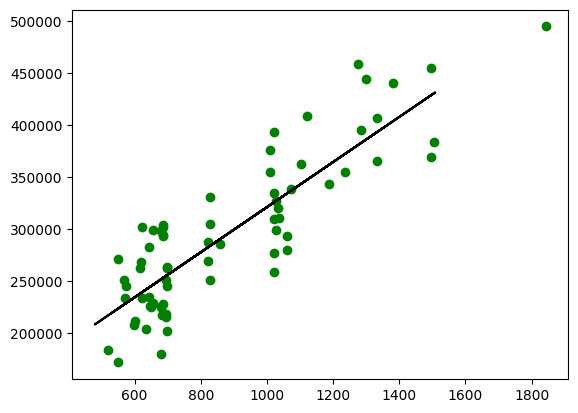

In [83]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_test,y_predict,color='k')
plt.show()